In [2]:
import pandas as pd
data=pd.read_csv('/Users/ayushbendale/Desktop/Datasets/Credit Card Dataset/creditcard.csv')

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [12]:
x=data.drop('Class',axis=1)
y=data['Class'].values

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
x_scale=MinMaxScaler().fit_transform(x.values)
y_scale=y.astype('bool')

In [22]:
x_scale.shape

(284807, 30)

In [24]:
# Define Autoencoder Model
from tensorflow.keras import regularizers,Input,Model
from tensorflow.keras.layers import Dense

encoding_dim=15

input_layer=Input(shape=(30,))

encoded=Dense(encoding_dim ,activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_layer)

decoded=Dense(30,activation='sigmoid')(encoded)

#autoencoder -this model maps an input to its reconstruction 
autoencoder=Model(input_layer,decoded)

In [25]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scale, y_scale, test_size=0.2, random_state=2021)

In [28]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((227845, 30), (227845,), (56962, 30), (56962,))

In [30]:
x_norm_train=x_train[~y_train]
x_norm_test=x_test[~y_test]
x_fraud_train=x_train[y_train]
x_fraud_test=x_test[y_test]

In [31]:
print("Length of normal train",len(x_norm_train))
print("Length of normal test",len(x_norm_test))
print("Length of fraud train",len(x_fraud_train))
print("Length of fraud test",len(x_fraud_test))

Length of normal train 227456
Length of normal test 56859
Length of fraud train 389
Length of fraud test 103


In [32]:
H = autoencoder.fit(x_norm_train,x_norm_train,epochs=20, batch_size=100,shuffle=True, validation_data=(x_test,x_test))

Epoch 1/20
2275/2275 [==============================] - 3s 1ms/step - loss: 0.5956 - val_loss: 0.5893
Epoch 2/20
2275/2275 [==============================] - 2s 1ms/step - loss: 0.5885 - val_loss: 0.5878
Epoch 3/20
2275/2275 [==============================] - 2s 1ms/step - loss: 0.5875 - val_loss: 0.5874
Epoch 4/20
2275/2275 [==============================] - 2s 1ms/step - loss: 0.5873 - val_loss: 0.5872
Epoch 5/20
2275/2275 [==============================] - 2s 1ms/step - loss: 0.5871 - val_loss: 0.5871
Epoch 6/20
2275/2275 [==============================] - 2s 1ms/step - loss: 0.5869 - val_loss: 0.5868
Epoch 7/20
2275/2275 [==============================] - 2s 1ms/step - loss: 0.5868 - val_loss: 0.5868
Epoch 8/20
2275/2275 [==============================] - 2s 1ms/step - loss: 0.5867 - val_loss: 0.5867
Epoch 9/20
2275/2275 [==============================] - 2s 1ms/step - loss: 0.5867 - val_loss: 0.5867
Epoch 10/20
2275/2275 [==============================] - 3s 1ms/step - loss: 0.586

Text(0, 0.5, 'loss')

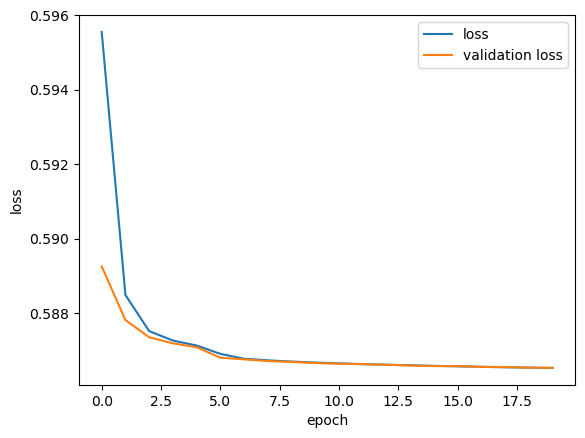

In [34]:
import matplotlib.pyplot as plt 
plt.plot(H.history['loss'], label='loss')
plt.plot(H.history['val_loss'], label='validation loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

In [35]:
pred=autoencoder.predict(x_test)
mse=np.mean(np.power(pred-x_test,2),axis=1)
error_df=pd.DataFrame({'Reconstruction_error':mse,'True_labels':y_test})

1781/1781 [==============================] - 1s 634us/step


In [36]:
error_df

,Reconstruction_error,True_labels
0,0.000455,False
1,0.000252,False
2,0.000303,False
3,0.000417,False
4,0.041819,False
...,...,...
56957,0.000222,False
56958,0.000169,False
56959,0.000855,False
56960,0.000318,False


In [37]:
threshold=0
groups=error_df.groupby('True_labels')

Text(0.5, 0, 'Data point index')

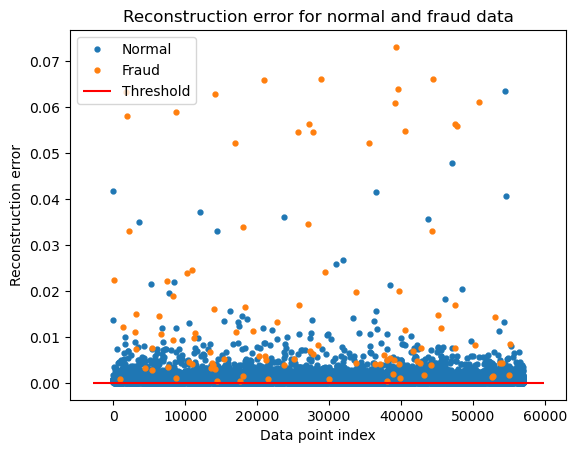

In [40]:
fig, ax = plt.subplots()
for labels, group in groups:
    plt.plot(group.index, group['Reconstruction_error'], marker='o',  ms=3.5, linestyle='', label='Fraud' if labels==1 else 'Normal')
plt.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
plt.legend()
plt.title("Reconstruction error for normal and fraud data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")

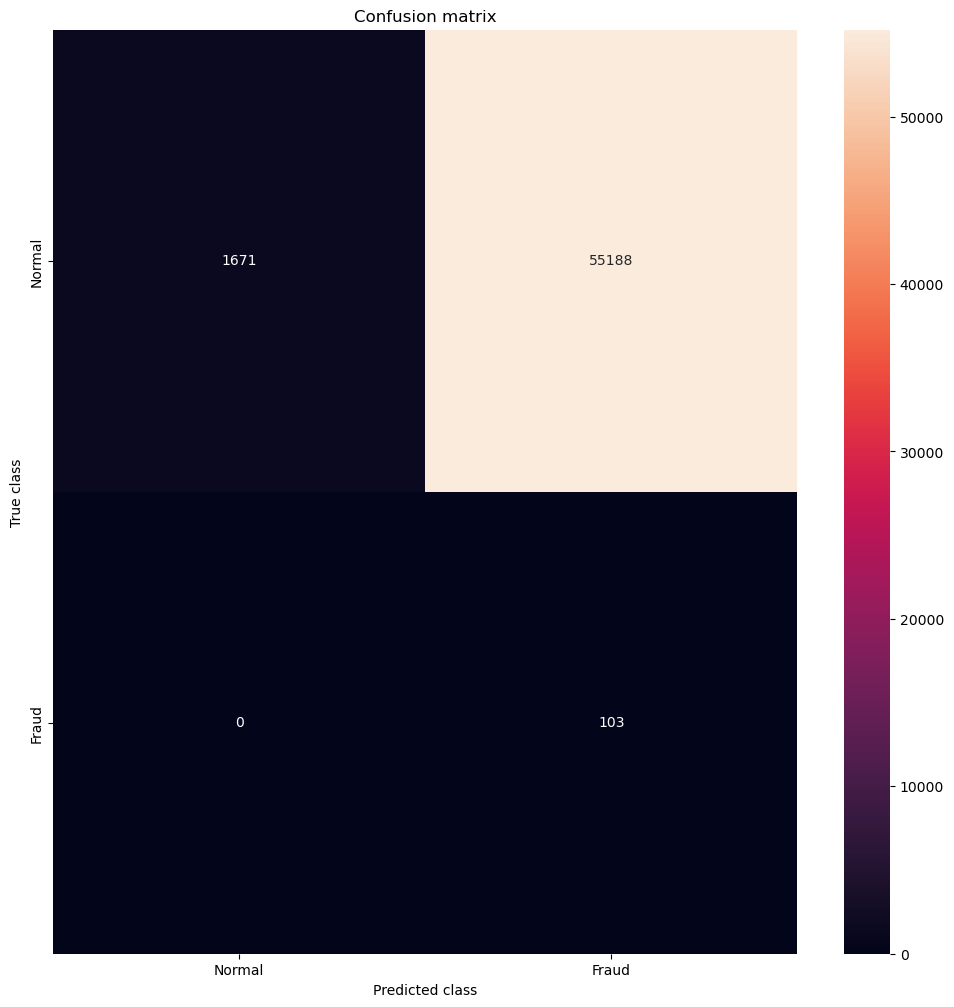

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
threshold_fixed = 0.0001
y_pred = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_labels, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=['Normal','Fraud'], yticklabels=['Normal','Fraud'], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()